# Project 4 - Unstructured Text Analysis
---

- Your Name Here: Xiaoya Luo
- WFU Email Address: luox23@wfu.edu
- Submission Date: 08/13/2023


# Instructions

1. Download the notebook `job_descriptions_and_resume.ipynb` and the dataset `MSBA20JobDescriptions.xlsx` from the course website.

2. Open the notebook on your local computer; Or upload and open it in Google Colab.

3. Replace the placeholder text above with your name, email address, and submission date.

4. Be sure to display your results.

5. Please submit your notebook in **HTML** and your writeup in a **Word doc**

## Load libraries

Load the following libraries, you may need to install them first!
- Data Manipulation: `pandas`, `numpy`
- Data Visualization：`seaborn`, `matplotlib.pyplot`
- Text libraries:
```python
import nltk
from nltk.util import ngrams
from nltk import bigrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from textblob import TextBlob
from wordcloud import WordCloud
```
- Other: `warnings` (ignore warning messages)

In [2]:
!pip install pdfminer.six

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 25.6 MB/s eta 0:00:00


In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pdfminer.high_level import extract_text
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk import bigrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from textblob import TextBlob
from wordcloud import WordCloud

## Task 0 - Gather Jobs

1. Create the jobs dataframe `df_jobs` by using `pd.read_excel()` to read in your `My20MSBAJobDescriptions.xlsx` (after you’ve loaded it with jobs of your choice)

> You can get started by using the `MSBA20JobDescription.xlsx` file if you want.

2. I recommend cleaning up the column names using:
```python
df_jobs.columns = (df_jobs.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('-', '_')
    .str.replace('(', '')
    .str.replace(')', '')
    .str.replace('?', '')
    .str.replace('\'', '')
)
```

3. Print the first 5 jobs to make sure your import works.

In [120]:
df_jobs = pd.read_excel('/content/MSBA20JobDescriptions.xlsx')
df_jobs


,Title,Firm,Job Description
0,Financial Analyst,Lockheed Martin,"This position is responsible for accounting, f..."
1,Business Advisory Consultant,EY,The opportunity\nEY’s Advisory Consultant Prog...
2,Consultant,FTI Consulting,"FTI Consulting, Inc. is a global business advi..."
3,Technology Advisory Program,EY,EY’s Advisory Consultant Program (ACP) is a gr...
4,Healthcare Business Analyst,Wellnecity,Help us change the rules of healthcare and cre...
5,Client Solutions Associate,Factset,FactSet creates data and software solutions fo...
6,Applied Analytics Associate,Berkeley Research Group,NaN
7,Marketing Analyst,Grit Media,As a Digital Marketing Analyst on the Grit Med...
8,Engineer I,Windstream Communication,Analyzes requirements to meet demand and perfo...
9,GPS Consulting Analyst,Deloitte,When organizations undergo significant changes...


In [121]:
df_jobs.columns = (df_jobs.columns
 .str.strip()
 .str.lower()
 .str.replace(' ', '_')
 .str.replace('-', '_')
 .str.replace('(', '')
 .str.replace(')', '')
 .str.replace('?', '')
 .str.replace('\'', '')
)
df_jobs.head()

<ipython-input-121-fc4e72ccfba0>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  .str.replace('(', '')
<ipython-input-121-fc4e72ccfba0>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  .str.replace(')', '')
<ipython-input-121-fc4e72ccfba0>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  .str.replace('?', '')


,title,firm,job_description
0,Financial Analyst,Lockheed Martin,"This position is responsible for accounting, f..."
1,Business Advisory Consultant,EY,The opportunity\nEY’s Advisory Consultant Prog...
2,Consultant,FTI Consulting,"FTI Consulting, Inc. is a global business advi..."
3,Technology Advisory Program,EY,EY’s Advisory Consultant Program (ACP) is a gr...
4,Healthcare Business Analyst,Wellnecity,Help us change the rules of healthcare and cre...


## Task 1 - Job Description Term & Bigram Frequency Analysis

1.Create a table of term frequencies

The following steps will help you make your `term_frequency` table need to make your first wordcloud.
- make a list called `exclude_words`:
>
```python
# This is just an exmaple:
exclude_words = ["key", "clients", "chicago"]
```
- download and create another list of stopwords
>
```python
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))
```

- pick your column of job description from `df_jobs`, implement the following:
  - change its text into lower cases
  - remove leading and trailing spaces
  - do string encodings using `.normalize('NFKD')`
  - make a list of text than create rows of words using `.explode()`
  - remove punctuation
  - remove digits (if needed)
  - name it as a new data frame `"term_df"` with a single column `"term"`

- pick your data frame `term_df`, implement the following steps:
  - remove words from your lists of `exclude_words` and `stop_words`
  - remove any words you think make sense
  - groupby("term") and summarize or simply use size()
  - sort terms by their frequency in descending order
  - create the `term_frequency` table
  - finally, print out the the top 20 terms

 > Hint:  A good reference is [here](https://colab.research.google.com/drive/1DdK_2Pn-LRSNnUhfuyBLEZlWvoFbffM_?usp=sharing).

In [122]:
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))
exclude_words = ["·", "•", "&","will","or","work", "job", "including","and", "in", "with", "for","you", "are", "as","on"]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [123]:
term_df = pd.DataFrame(df_jobs, columns=['job_description'])
term_df = (df_jobs['job_description']
                   .str.lower()
                   .str.strip() # remove leading and trailing spaces
                   .str.normalize('NFKD') # string encodings
                   .str.split() # make a list of text
                   .explode() # create rows of words
                   .str.replace(f"[{string.punctuation}]", "") # Remove punctuation
                   .to_frame('term')
)
term_df

<ipython-input-123-deb6e8713cef>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  .str.replace(f"[{string.punctuation}]", "") # Remove punctuation


,term
0,this
0,position
0,is
0,responsible
0,for
...,...
35,macros
35,python
35,and
35,statistical


In [124]:
#filter the stopwords and exclude words
term_df = term_df[~term_df['term'].isin(stop_words)& ~term_df['term'].isin(exclude_words)]
term_df

,term
0,position
0,responsible
0,accounting
0,financial
0,planning
...,...
35,excel
35,macros
35,python
35,statistical


In [125]:
term_df = (term_df
            .groupby("term")
            .size()
            .reset_index()
            .rename(columns={0: "freq"})
            .sort_values("freq", ascending=False)
            .dropna()
            .reset_index(drop=True)
            )
term_df.head(20)

,term,freq
0,business,140
1,data,131
2,skills,104
3,,91
4,experience,80
5,clients,77
6,ability,65
7,team,55
8,client,50
9,management,49


2. Create a wordcloud with all of the terms, using WordCloud()

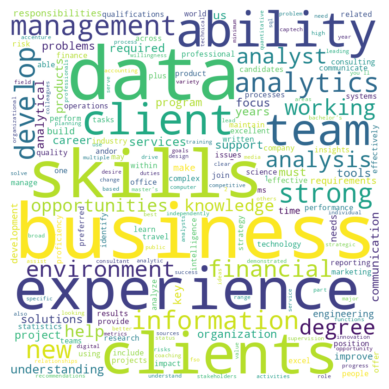

In [126]:
# Create a dictionary of terms and frequencies
term_freq = dict(zip(term_df['term'],
                    term_df['freq']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(term_freq)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

3. Create a wordcloud for the terms that start with the letter "a"
> Hint: Filter the data using something like this
```python
term_frequency['term'].str.startswith('a')
```

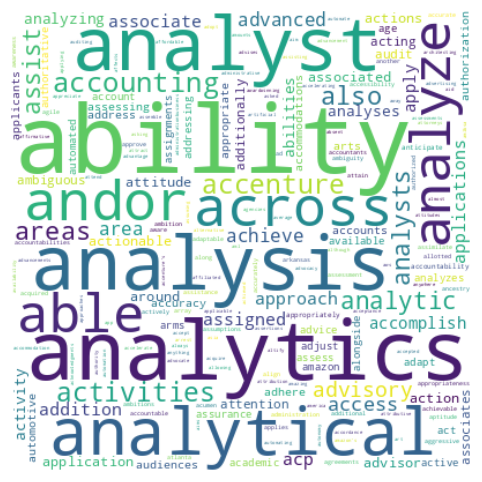

In [127]:
filtered_terms = term_df['term'].str.startswith('a')
start_with_a = term_df[filtered_terms]
start_with_a
start_with_a_dict = dict(zip(start_with_a['term'],
                             start_with_a['freq']))
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(start_with_a_dict)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

4. Create a word cloud of companies

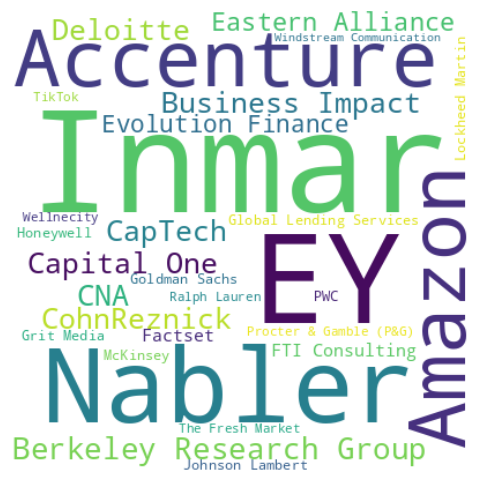

In [128]:
firm_df = df_jobs.groupby('firm').agg({'firm': 'count'})
firm_df.columns = ['freq']
firm_df = firm_df.reset_index()
term_df_dict = dict(zip(firm_df['firm'], firm_df['freq']))
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(term_df_dict)
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

5. Create a word cloud of job titles.

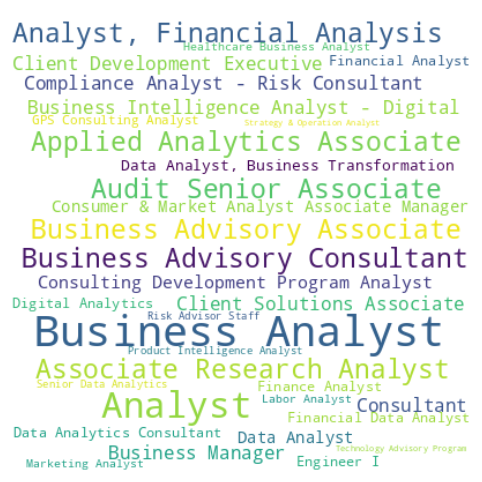

In [129]:
job_titles_df = df_jobs.groupby('title').agg({'title': 'count'})
job_titles_df.columns = ['freq']
job_titles_df = job_titles_df.reset_index()
job_titles_df_dict = dict(zip(job_titles_df['title'], job_titles_df['freq']))
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(job_titles_df_dict)
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Task 2 - Words after DATA

Clearly "DATA" an important word so what words come after data?

1.	Create a bi-gram of Job Description terms starting with the word "Data", group by bigram and count them up into a `bigram_term_frequency` table. A good reference is the bigram example [here](https://colab.research.google.com/drive/1DdK_2Pn-LRSNnUhfuyBLEZlWvoFbffM_?usp=sharing).

In [130]:
ngram_size = 2

# Extract bi-grams from the "full_text" column
bigram_df = (df_jobs['job_description']
             .dropna()
             .str.lower()
             .str.replace(f"[{string.punctuation}]", "") # Remove punctuation
             .str.split()
             .apply(lambda x: list(ngrams(x, ngram_size))) # Extract bi-grams
             .explode()
             .reset_index(drop=True)
             .to_frame('term')
          )
bigram_freq = (bigram_df.groupby("term")
                     .agg(freq=("term", "count"))
                     .reset_index()
                     .sort_values("freq", ascending=False)
                     #.rename(columns={"big": "term"})
                     .dropna()
                     .reset_index(drop=True)
)
bigram_freq
# bigram_df_filter = bigram_freq[bigram_freq['term']].apply(lambda x: x[0] == 'data')
bigram_term_frequency = bigram_freq[bigram_freq['term'].str[0] == 'data']
bigram_term_frequency

<ipython-input-130-00fd3b1c7e44>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  .str.replace(f"[{string.punctuation}]", "") # Remove punctuation


,term,freq
42,"(data, and)",13
103,"(data, analytics)",8
180,"(data, analysis)",7
183,"(data, sources)",7
189,"(data, sets)",7
...,...,...
7475,"(data, media)",1
7476,"(data, may)",1
7478,"(data, make)",1
7479,"(data, languages)",1


In [131]:
bigram_freq

,term,freq
0,"(ability, to)",64
1,"(of, the)",61
2,"(in, the)",43
3,"(in, a)",42
4,"(to, work)",34
...,...,...
9764,"(leverage, historical)",1
9765,"(leverage, analytic)",1
9766,"(levels, will)",1
9767,"(bring, their)",1


In [132]:
# ~term_df['term'].isin(stop_words)
bigram_term_frequency = bigram_term_frequency[~bigram_term_frequency['term'].apply(lambda x: x[1] in stop_words)]
# bigram_term_frequency = bigram_freq['term'].apply(lambda x: x.str[1].isin(stop_words))
# bigram_term_frequency = bigram_freq[~bigram_freq['term'].str[1] == 'stop_words']
bigram_term_frequency

,term,freq
103,"(data, analytics)",8
180,"(data, analysis)",7
183,"(data, sources)",7
189,"(data, sets)",7
666,"(data, quality)",4
667,"(data, science)",4
668,"(data, visualization)",4
690,"(data, analyst)",4
691,"(data, management)",4
1103,"(data, points)",3


2. Create a word cloud of data + term combinations, by filter the bigram_term_frequency for bigrams starting with “data”

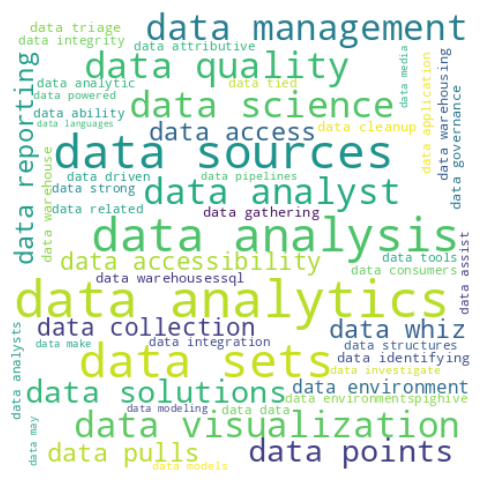

In [133]:
bigram_term_frequency_df_dict = dict(zip(bigram_term_frequency['term'].str[0] + " " + bigram_term_frequency['term'].str[1], bigram_term_frequency['freq']))
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(bigram_term_frequency_df_dict)
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


3. Create a bar chart of the top 10, data + term combinations.


In [134]:
top_ten_data_words = bigram_term_frequency.head(10)
top_ten_data_words


,term,freq
103,"(data, analytics)",8
180,"(data, analysis)",7
183,"(data, sources)",7
189,"(data, sets)",7
666,"(data, quality)",4
667,"(data, science)",4
668,"(data, visualization)",4
690,"(data, analyst)",4
691,"(data, management)",4
1103,"(data, points)",3


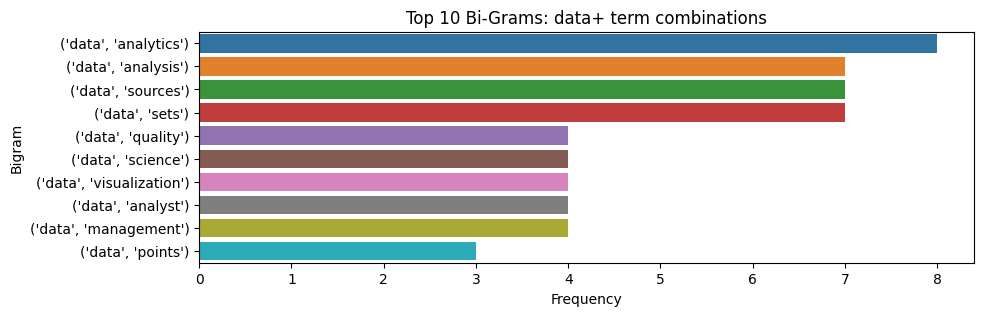

In [135]:
plt.figure(figsize=(10, 3))
sns.barplot(x="freq", y="term", data=bigram_term_frequency.head(10)) # color="lightblue"
plt.title('Top 10 Bi-Grams: data+ term combinations')
plt.xlabel('Frequency')
plt.ylabel('Bigram');

## Task 3 - Analyze Technology

Here is a list of important technology terms - you of course should add more.
- creat 2 lists as shown below
- add any additional technology term or bigram that you think are useful.

```python
technology_words = [
    "analytics",
    "data",
    "analyze",
    "r",
    "python",
    "sql",
    "excel",
    "cloud",
    "aws",
    "azure",
    "ec2",
    "sas",
    "spss",
    "saas",
    "spark",
    "tensorflow",
    "sagemaker",
    "tableau",
    "hadoop",
    "pyspark",
    "h2o.ai",
    "spark",
    "ai",
    "shiny",
    "dash",
    "pca",
    "k-means",
    "emr",
    "mapreduce",
    "nosql",
    "hive",
    "presentation",
    "nltk",
    "scikit",
    "javascript",
    "etl"]


technology_bigrams = [
  "business intelligence",
  "text mining",
  "logistic regression",
  "amazon web",
  "big data",
  "business analytics",
  "google cloud",
  "microsoft azure",
  "machine learning",
  "data science",
  "deep learning",
  "neural network",
  "neural networks",
  "neural nets",
  "random forests",
  "random forest",
  "elastic search",
  "map reduce",
  "artificial intelligence"]
```

1. Filter the `term_frequency` table you made in task 1 based on the `technology_words` provided, resulting a new table `tech_term_freq`

2. Filter the `bigram_frequency` table you made in task 2 based on `technology_bigrams` provided, resulting a new table `tech_bigram_freq`

3. Smash the 2 tables together vertically as new table `technology_term_frequency` using `pd.concate()`
> Hint: only include 2 columns, "terms" and "freq"

4. Make a Bar Chart of top 10 Technolgy Terms.

5. Make a Wordcloud of all Techology Terms.

In [136]:
technology_words = [
    "analytics",
    "data",
    "analyze",
    "r",
    "python",
    "sql",
    "excel",
    "cloud",
    "aws",
    "azure",
    "ec2",
    "sas",
    "spss",
    "saas",
    "spark",
    "tensorflow",
    "sagemaker",
    "tableau",
    "hadoop",
    "pyspark",
    "h2o.ai",
    "spark",
    "ai",
    "shiny",
    "dash",
    "pca",
    "k-means",
    "emr",
    "mapreduce",
    "nosql",
    "hive",
    "presentation",
    "nltk",
    "scikit",
    "javascript",
    "etl"]

In [137]:
technology_bigrams = [
  "business intelligence",
  "text mining",
  "logistic regression",
  "amazon web",
  "big data",
  "business analytics",
  "google cloud",
  "microsoft azure",
  "machine learning",
  "data science",
  "deep learning",
  "neural network",
  "neural networks",
  "neural nets",
  "random forests",
  "random forest",
  "elastic search",
  "map reduce",
  "artificial intelligence"]

In [138]:
# Filter the term_frequency table you made in task 1 based on the technology_words provided, resulting a new table tech_term_freq
filter_tech_term = term_df['term'].isin(technology_words)
tech_term_freq = term_df[filter_tech_term].reset_index(drop=True)
tech_term_freq

,term,freq
0,data,131
1,analytics,48
2,analyze,20
3,excel,20
4,sql,13
5,python,8
6,tableau,6
7,r,4
8,spss,2
9,presentation,2


In [139]:
# Filter the bigram_frequency table you made in task 2 based on technology_bigrams provided, resulting a new table tech_bigram_freq
bigram_freq['bigram_wo_stopwords'] = bigram_freq['term'].apply(lambda x: ' '.join([word for word in x if pd.notna(word) and word.lower() not in stop_words]))
# select only bigrams that contain two words
bigram_freq = bigram_freq[bigram_freq['bigram_wo_stopwords'].str.split().str.len() == 2].reset_index(drop=True)
filter_bigram = bigram_freq['bigram_wo_stopwords'].isin(technology_bigrams)
tech_bigram_freq = bigram_freq[filter_bigram].reset_index(drop=True)
tech_bigram_freq


,term,freq,bigram_wo_stopwords
0,"(business, intelligence)",6,business intelligence
1,"(business, analytics)",4,business analytics
2,"(data, science)",4,data science
3,"(big, data)",3,big data
4,"(machine, learning)",2,machine learning
5,"(amazon, web)",1,amazon web
6,"(artificial, intelligence)",1,artificial intelligence


In [140]:
tech_bigram_freq['term'] = tech_bigram_freq['bigram_wo_stopwords']
tech_bigram_freq.drop(columns=['bigram_wo_stopwords'], inplace=True)
tech_bigram = pd.DataFrame(tech_bigram_freq)
tech_bigram
tech_term = pd.DataFrame(tech_term_freq)

In [141]:
# Smash the 2 tables together vertically as new table technology_term_frequency using pd.concate()
# Hint: only include 2 columns, "terms" and "freq"
technology_term_frequency = pd.concat([tech_term_freq,tech_bigram_freq], axis = 0)
technology_term_frequency

,term,freq
0,data,131
1,analytics,48
2,analyze,20
3,excel,20
4,sql,13
5,python,8
6,tableau,6
7,r,4
8,spss,2
9,presentation,2


In [142]:
# Make a Bar Chart of top 10 Technolgy Terms.
top_10_technology_terms = technology_term_frequency.sort_values(by='freq', ascending=False).head(10)
top_10_technology_terms

,term,freq
0,data,131
1,analytics,48
2,analyze,20
3,excel,20
4,sql,13
5,python,8
6,tableau,6
0,business intelligence,6
1,business analytics,4
2,data science,4


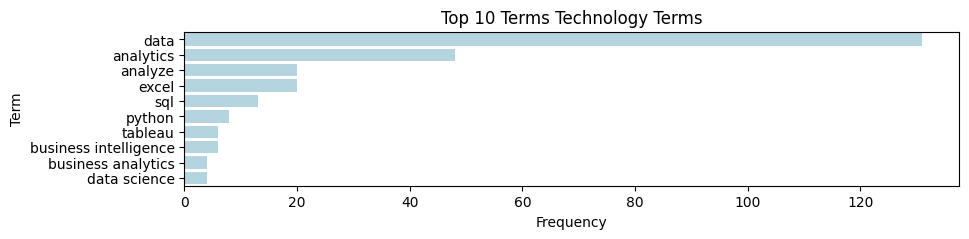

In [143]:
# Create bar plot of top 10 Technology Terms
plt.figure(figsize=(10, 2))
sns.barplot(x="freq", y="term", data = top_10_technology_terms, color="lightblue")
plt.title('Top 10 Terms Technology Terms')
plt.xlabel('Frequency')
plt.ylabel('Term');

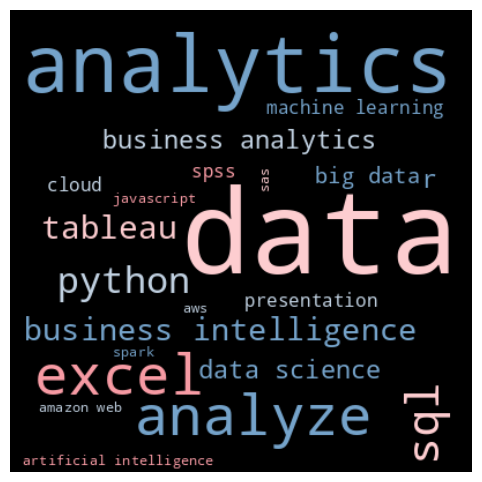

In [144]:
import random
technology_term_frequency_df_dict = dict(zip(technology_term_frequency['term'], technology_term_frequency['freq']))
wordcloud = WordCloud(width=400, height=400, background_color='black',color_func=lambda *args, **kwargs: random.choice(['#75a3ca', '#f79ba4', '#fdcdd0', '#c1d1e1'])).generate_from_frequencies(technology_term_frequency_df_dict)
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Task 4 - Your Resume

1. Save/print your resume as PDF, it needs to be PDF format for this to work.

2. Install pdfminer and import the function extract_text()

3. Use PdfReader to read your resume into a table. For example:

```python
!pip install pdfminer.six
from pdfminer.high_level import extract_text

def extract_text_from_pdf(file_path):
    return extract_text(file_path)

text = extract_text_from_pdf('your_file.pdf')
print(text)

# Split text by rows and store them as a data frame
cv_df = pd.DataFrame({'cv_text': text.split('\n')})

```

4. Parse your resume, filter out the common words, digits, and any excludes

5. Create a word cloud of the remaining words in your resume

6. Filter for technology_words and technology_bigrams smash the results together (just like in task 3). To do this, you will need to
  - create Words Freq and Bigram Freq based on your resume
  - then filter for technology_words and technology_bigrams

7. Make a bar chart of top 10 combined technolgy term frequencies
8. Make a wordcloud of all combined technolgy term frequencies

In [146]:
!pip install pdfminer.six

In [147]:
from pdfminer.high_level import extract_text

def extract_text_from_pdf(file_path):
    return extract_text(file_path)

text = extract_text_from_pdf('/content/XiaoyaLuoResumeV1.pdf')
print(text)

# Split text by rows and store them as a data frame
resume = pd.DataFrame({'resume_text': text.split('\n')})

Xiaoya (SINDY) LUO 
Strategic | Gregarious | Business Analyst 
New York, NY | luox23@wfu.edu | 201.887.2628 | linkedin.com/in/xiaoya-luo 

EDUCATION 
Wake Forest University School of Business 
Master of Science in Business Analytics 
Relevant Coursework:  Analytics software Technology, Probability & Statistical Modeling 

Winston-Salem, NC 
May 2024 

Pace University, Lubin School of Business 
Bachelor of Business Administration in Accounting | GPA: 3.92  
Relevant Coursework: Accounting Information System, Quantitative Analysis, Data Structures, Computer Science (Python, Scala) 
Honors: Deans List, First Honor Scholarships  
Study Abroad: International Christian University – Tokyo, Japan 

New York, NY 
May 2021 

Summer 2019 

RELEVANT SKILLS 
Microsoft Office Suite:  Word (Advanced), Excel (Advanced), PowerPoint (Proficient), Outlook | Technical Skills: HTML, CSS, 
Tableau, Python, JavaScript, Scala, Zoom | Certifications: Microsoft Office Specialist: Excel Associate | Power Skills:

In [148]:
resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   resume_text  111 non-null    object
dtypes: object(1)
memory usage: 1016.0+ bytes


In [149]:
# Parse your resume, filter out the common words, digits, and any excludes
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))
resume_exclude_words = ["·", ' ',"●","from","or","work", "job", "including","and", "to", "the", "of","a", "in", "with", "for","you", "are", "as","on"]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [150]:
resume_df = (resume['resume_text']
                   .str.lower()
                   .str.strip() # remove leading and trailing spaces
                   .str.normalize('NFKD') # string encodings
                   .str.split() # make a list of text
                   .explode() # create rows of words
                   .str.replace(f"[{string.punctuation}]", "") # Remove punctuation
                   .to_frame('term')
                   .dropna()
)
resume_df



<ipython-input-150-e345df43bc2a>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  .str.replace(f"[{string.punctuation}]", "") # Remove punctuation


,term
0,xiaoya
0,sindy
0,luo
1,strategic
1,
...,...
100,planning
100,quantitative
100,research
100,business


In [151]:
resume_filter_df = resume_df[~resume_df['term'].isin(stop_words)& ~resume_df['term'].isin(resume_exclude_words)]
resume_filter_df = (resume_filter_df
            .groupby("term")
            .size()
            .reset_index()
            .rename(columns={0: "freq"})
            .sort_values("freq", ascending=False)
            .dropna()
            .reset_index(drop=True)
            )
resume_filter_df

,term,freq
0,,11
1,data,10
2,business,8
3,analysis,7
4,skills,7
...,...,...
297,honor,1
298,honors,1
299,html,1
300,income,1


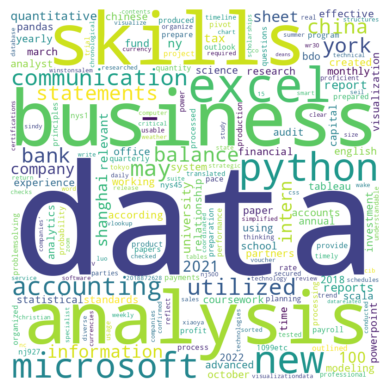

In [152]:
# Create a word cloud of the remaining words in your resume
resume_freq = dict(zip(resume_filter_df['term'],
                    resume_filter_df['freq']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(resume_freq)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [153]:
resume_df['term']

0             xiaoya
0              sindy
0                luo
1          strategic
1                   
           ...      
100         planning
100     quantitative
100         research
100         business
100    communication
Name: term, Length: 599, dtype: object

In [154]:
words_freq = (resume_df
            .groupby("term")
            .size()
            .reset_index()
            .rename(columns={0: "freq"})
            .sort_values("freq", ascending=False)
            .dropna()
            .reset_index(drop=True)
            )
words_freq

,term,freq
0,and,24
1,the,23
2,●,14
3,of,13
4,to,12
...,...,...
320,inputted,1
321,integrated,1
322,integrity,1
323,interactive,1


In [155]:
ngram_size = 2
resume_bigram_df = (resume['resume_text']
                    .str.lower()
                    .str.replace(f"[{string.punctuation}]", "") # Remove punctuation
                    .str.split()
                    .apply(lambda x: list(ngrams(x, ngram_size))) # Extract bi-grams
                    .explode()
                    .reset_index(drop=True)
                    .to_frame('term')
                    .dropna()
                    )
resume_bigram_freq = (resume_bigram_df.groupby("term")
                     .agg(freq=("term", "count"))
                     .reset_index()
                     .sort_values("freq", ascending=False)
                     #.rename(columns={"big": "term"})
                     .dropna()
                     .reset_index(drop=True)
)
resume_bigram_freq

<ipython-input-155-b674ffa4f717>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  .str.replace(f"[{string.punctuation}]", "") # Remove punctuation


,term,freq
0,"(microsoft, excel)",4
1,"(new, york)",4
2,"(skills, utilized)",4
3,"(of, the)",4
4,"(utilized, microsoft)",3
...,...,...
471,"(english, fluent)",1
472,"(energy, usage)",1
473,"(effectively, using)",1
474,"(effective, highquality)",1


In [156]:
# Filter for technology_words and technology_bigrams smash the results together (just like in task 3). To do this, you will need to
# create Words Freq and Bigram Freq based on your resume
# then filter for technology_words and technology_bigrams
resume_word= [
    "skills",
    "data",
    "analysis",
    "business",
    "excel",
    "python",
    "communication",
    "microsoft",
    "accounting",
    "auditing",
    "reports",
    "tax",
    "balance",
    "utilized",
    "data",
    "analytics",
    "excel",
    "analyze",
    "sql",
    "r",
    "tableau",
    "presentation",
    "spss",
    "cloud",
    "spark"
    "sas",
    "javascript"
    "aws"
]
resume_bigram = [
    "microsoft excel",
    "data analysis",
    "business communication",
    "business analytics"
    "business intelligence",
    "text mining",
    "logistic regression",
    "amazon web",
    "big data",
    "business analytics",
    "google cloud",
    "microsoft azure",
    "machine learning",
    "data science",
    "deep learning",
    "neural network",
    "neural networks",
    "neural nets",
    "random forests",
    "random forest",
    "elastic search",
    "map reduce",
    "artificial intelligence"
    ]

In [157]:
filter_technology_term = words_freq['term'].isin(resume_word)
technology_words = words_freq[filter_technology_term].reset_index(drop=True)
technology_words

,term,freq
0,data,10
1,business,8
2,analysis,7
3,skills,7
4,excel,7
5,python,6
6,microsoft,6
7,accounting,5
8,utilized,5
9,communication,5


In [158]:
# Filter the bigram_frequency table you made in task 2 based on technology_bigrams provided, resulting a new table tech_bigram_freq
resume_bigram_freq['bigram_stopwords'] = resume_bigram_freq['term'].apply(lambda x: ' '.join([word for word in x if pd.notna(word) and word.lower() not in stop_words]))
# select only bigrams that contain two words
resume_bigram_freq = resume_bigram_freq[resume_bigram_freq['bigram_stopwords'].str.split().str.len() == 2].reset_index(drop=True)
resume_filter_bigram = resume_bigram_freq['bigram_stopwords'].isin(resume_bigram)
technology_bigram = resume_bigram_freq[resume_filter_bigram].reset_index(drop=True)
technology_bigram

,term,freq,bigram_stopwords
0,"(microsoft, excel)",4,microsoft excel
1,"(data, analysis)",2,data analysis
2,"(business, communication)",1,business communication
3,"(business, analytics)",1,business analytics


In [159]:
technology_bigram['term'] = technology_bigram['bigram_stopwords']
technology_bigram.drop(columns=['bigram_stopwords'], inplace=True)
technology_bigram = pd.DataFrame(technology_bigram)
tech_bigram
technology_term = pd.DataFrame(technology_words)

In [160]:
resume_technology_term_frequency = pd.concat([technology_term,technology_bigram], axis = 0)
resume_technology_term_frequency

,term,freq
0,data,10
1,business,8
2,analysis,7
3,skills,7
4,excel,7
5,python,6
6,microsoft,6
7,accounting,5
8,utilized,5
9,communication,5


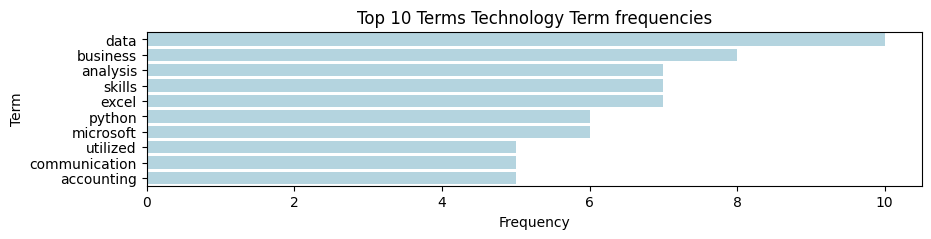

In [161]:
resume_top_10_technology_terms = resume_technology_term_frequency.sort_values(by='freq', ascending=False).head(10)
resume_top_10_technology_terms
# Make a bar chart of top 10 combined technolgy term frequencies
plt.figure(figsize=(10, 2))
sns.barplot(x="freq", y="term", data=resume_top_10_technology_terms, color="lightblue")
plt.title('Top 10 Terms Technology Term frequencies')
plt.xlabel('Frequency')
plt.ylabel('Term');

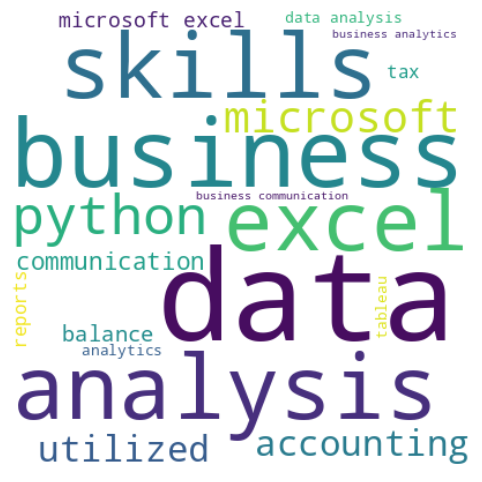

In [162]:
# Make a wordcloud of all combined technolgy term frequencies
import random
resume_technology_term_frequency_df_dict = dict(zip(resume_technology_term_frequency['term'], resume_technology_term_frequency['freq']))
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(resume_technology_term_frequency_df_dict)
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Task 5 - Compare Resume vs Jobs

1. What terms do your resume and jobs data have in common? That is, compare your resume’s terms to the terms found in the job descriptions. Find the top 10 terms in common.
> Hint: `pd.merge(how='inner')` or how ever you want to do it.

2. Based on the job's terms, what terms are missing from your resume? Make a table of top 10 terms missing from your resume but found in your job descriptions.
> Hint: `pd.merge(how='left')` or how ever you want to do it.

3. What tech-skills does your resume and jobs have in common? Find the top 5 technology terms.
> Hint: `pd.merge(how='inner')` or filter `.isin()`


4. Based on the job's tech-skills, what are top 5 skills are missing from your resume?
> Hint: `pd.merge(how='left')` or filter not in

In [163]:
# What terms do your resume and jobs data have in common? That is, compare your resume’s terms to the terms found in the job descriptions. Find the top 10 terms in common.
job_description_data_resume = pd.merge(term_df, words_freq, on='term', how = 'inner')
job_description_data_resume

,term,freq_x,freq_y
0,business,140,8
1,data,131,10
2,skills,104,7
3,,91,11
4,experience,80,2
...,...,...,...
176,fees,1,1
177,fluent,1,1
178,organize,1,1
179,outlined,1,1


In [175]:
job_description_data_resume_bigram = pd.merge(bigram_freq, resume_bigram_freq, how = 'inner')
job_description_data_resume_bigram.head()

,term,freq,bigram_wo_stopwords,bigram_stopwords
0,"(professional, experience)",1,professional experience,professional experience
1,"(accepted, accounting)",1,accepted accounting,accepted accounting
2,"(wake, forest)",1,wake forest,wake forest
3,"(working, paper)",1,working paper,working paper
4,"(analysis, data)",1,analysis data,analysis data


In [165]:
# Based on the job's terms, what terms are missing from your resume? Make a table of top 10 terms missing from your resume but found in your job descriptions.
# Hint: pd.merge(how='left') or how ever you want to do it.
job_description_data_resume_missing = pd.merge(term_df, words_freq, on='term', how = 'left')
job_description_data_resume_missing
filtered_description = job_description_data_resume_missing[pd.isna(job_description_data_resume_missing['freq_y'])]
filtered_description.head(10)

,term,freq_x,freq_y
5,clients,77,NaN
6,ability,65,NaN
7,team,55,NaN
8,client,50,NaN
10,develop,48,NaN
12,strong,47,NaN
16,environment,41,NaN
20,degree,38,NaN
21,opportunities,35,NaN
22,knowledge,32,NaN


In [166]:
# What tech-skills does your resume and jobs have in common? Find the top 5 technology terms.
# Hint: pd.merge(how='inner') or filter .isin()
tech_skills_filter = pd.merge(tech_term_freq, technology_words, on = 'term',how = 'inner')
tech_skills_filter

,term,freq_x,freq_y
0,data,131,10
1,analytics,48,2
2,excel,20,7
3,python,8,6
4,tableau,6,2


In [169]:
# Based on the job's tech-skills, what are top 5 skills are missing from your resume?
# Hint: pd.merge(how='left') or filter not in
tech_skills_data_resume_missing = pd.merge(tech_term_freq, technology_words, on='term', how = 'left')
tech_skills_data_resume_missing
filtered_tech = tech_skills_data_resume_missing[pd.isna(tech_skills_data_resume_missing['freq_y'])]
filtered_tech

,term,freq_x,freq_y
2,analyze,20,NaN
4,sql,13,NaN
7,r,4,NaN
8,spss,2,NaN
9,presentation,2,NaN
10,cloud,2,NaN
11,spark,1,NaN
12,sas,1,NaN
13,aws,1,NaN
14,javascript,1,NaN


## Finally
Convert this to **HTML** and do you writeup in a **Word document**.